In [140]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers as ly
import pandas as pd
from tensorflow.keras.utils import to_categorical 
import matplotlib.pyplot as plt

In [2]:
data = tf.keras.datasets.mnist

In [87]:
(train_images,train_out), (test_images,test_out) = data.load_data()
# print (train_images.shape[2])

In [88]:
(train_images,test_images) = train_images/255.0 , test_images/255.0
train_images = train_images.reshape(train_images.shape[0],train_images.shape[1],train_images.shape[2],1)
test_images = test_images.reshape(test_images.shape[0], test_images.shape[1],test_images.shape[2],1)
train_out, test_out = to_categorical(train_out), to_categorical(test_out)


(60000, 28, 28, 1)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [160]:
model = tf.keras.models.Sequential()
model.add(ly.Conv2D(32,kernel_size=(5,5),strides=1,activation='relu',padding='same',input_shape=(28,28,1)))
model.add(ly.Dropout(0.2))
model.add(ly.MaxPool2D(pool_size=(2,2),strides=2,padding='same'))
model.add(ly.Conv2D(32,kernel_size=(5,5),strides=1,padding='same',activation='relu'))
model.add(ly.Dropout(0.2))
model.add(ly.MaxPool2D(pool_size=(2,2),strides=2,padding='same'))
model.add(ly.Flatten())
model.add(ly.Dense(1568,activation='relu'))
model.add(ly.Dense(10,activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()
          

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
dropout_2 (Dropout)          (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 32)        25632     
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1568)              0         
__________

In [161]:
model.fit(train_images,train_out,validation_split=0.2,epochs=10,batch_size=128)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 157s 3ms/step - loss: 0.1618 - acc: 0.9504 - val_loss: 0.0659 - val_acc: 0.9808
Epoch 2/10
48000/48000 [==============================] - 152s 3ms/step - loss: 0.0494 - acc: 0.9847 - val_loss: 0.0450 - val_acc: 0.9874
Epoch 3/10
48000/48000 [==============================] - 153s 3ms/step - loss: 0.0340 - acc: 0.9895 - val_loss: 0.0383 - val_acc: 0.9897
Epoch 4/10
48000/48000 [==============================] - 152s 3ms/step - loss: 0.0245 - acc: 0.9921 - val_loss: 0.0338 - val_acc: 0.9912
Epoch 5/10
48000/48000 [==============================] - 152s 3ms/step - loss: 0.0203 - acc: 0.9932 - val_loss: 0.0315 - val_acc: 0.9907
Epoch 6/10
48000/48000 [==============================] - 152s 3ms/step - loss: 0.0156 - acc: 0.9949 - val_loss: 0.0330 - val_acc: 0.9894
Epoch 7/10
48000/48000 [==============================] - 152s 3ms/step - loss: 0.0120 - acc: 0.9960 - val_loss: 0.0352 - 

In [162]:
model.evaluate(test_images,test_out)

10000/10000 [==============================] - 9s 924us/step


[0.025922910743330432, 0.9916]

In [163]:
model.save('mnistCNN.h5')

In [164]:
from PIL import Image

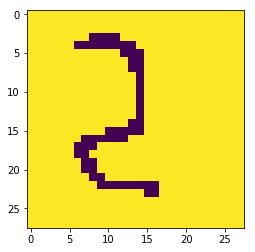

In [169]:
img = Image.open('test4.png').convert('L')
img = img.resize((28,28))
# img1= plt.imread('test2.jpg')
plt.imshow(img1)
im2arr = np.array(img)

im2arr = im2arr/255.0
plt.imshow(im2arr)
im2arr = im2arr.reshape(1,28,28,1)

In [170]:
model.predict(im2arr)

array([[1.1480301e-02, 1.1264405e-03, 1.6554138e-01, 7.8289711e-01,
        2.4839707e-03, 4.1014533e-03, 2.4264875e-04, 2.5631995e-03,
        1.1170991e-02, 1.8392669e-02]], dtype=float32)